# Информация о данных:
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


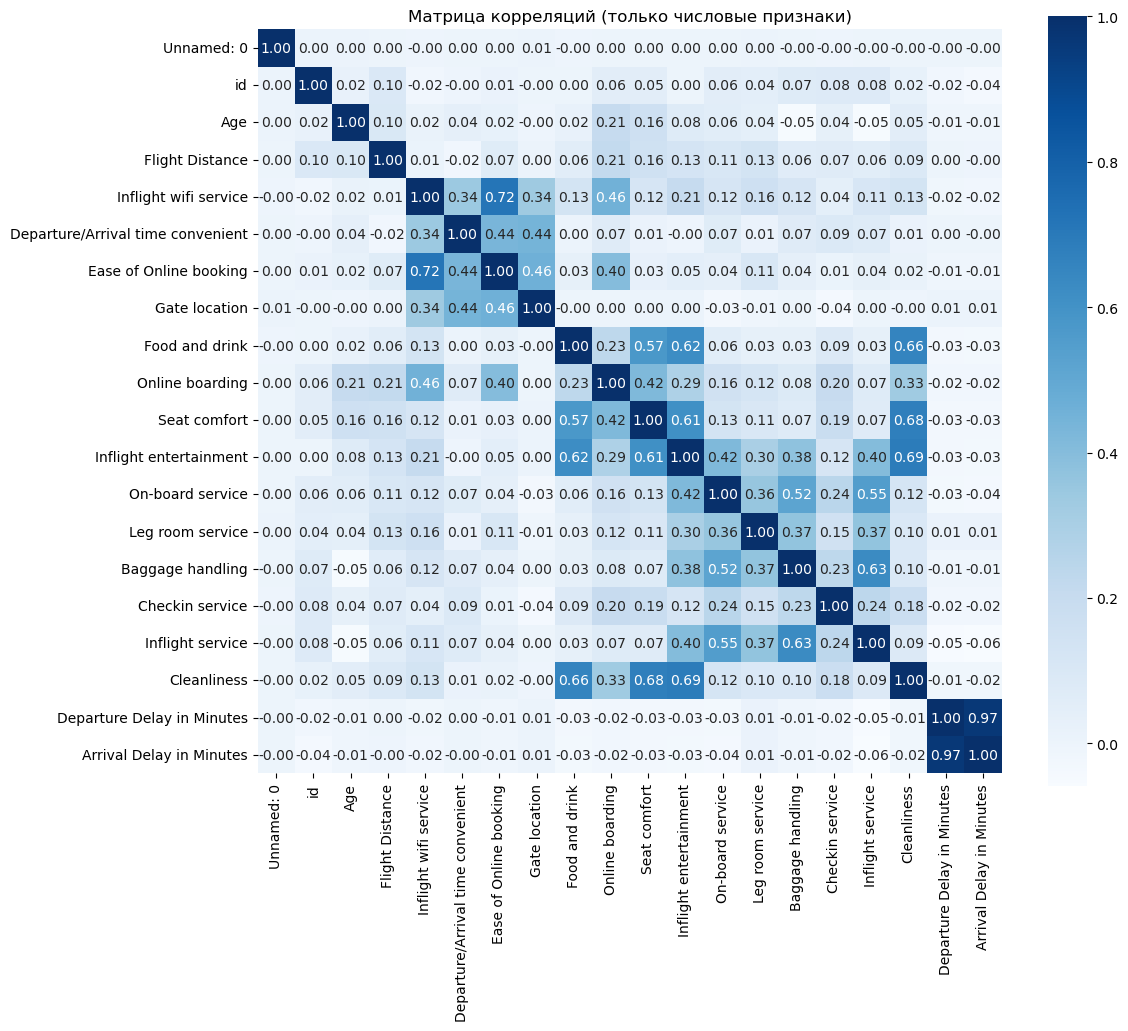

In [3]:
numeric_df = df.select_dtypes(include=['number'])
corr_mat = numeric_df.corr()

# Строим heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_mat, square=True, cmap='Blues', annot=True, fmt='.2f')
plt.title('Матрица корреляций (только числовые признаки)')
plt.show()

In [4]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [5]:
df1 = df[['Departure Delay in Minutes', 'Seat comfort', 'Age', 'satisfaction']]
df
df1.head()

,Departure Delay in Minutes,Seat comfort,Age,satisfaction
0,25,5,13,neutral or dissatisfied
1,1,1,25,neutral or dissatisfied
2,0,5,26,satisfied
3,11,2,25,neutral or dissatisfied
4,0,5,61,satisfied


In [6]:
df1['satisfaction'] = df1['satisfaction'].map({
    'satisfied': 1,
    'neutral or dissatisfied': 0
})
df1.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6152\2863715041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['satisfaction'] = df1['satisfaction'].map({


,Departure Delay in Minutes,Seat comfort,Age,satisfaction
0,25,5,13,0
1,1,1,25,0
2,0,5,26,1
3,11,2,25,0
4,0,5,61,1


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
X = df1.drop('satisfaction',axis=1)
y = df1['satisfaction']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
scaler = StandardScaler()

In [11]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn_model = KNeighborsClassifier(n_neighbors=10)

In [14]:
knn_model.fit(scaled_X_train,y_train)


KNeighborsClassifier(n_neighbors=10)

In [15]:
y_pred = knn_model.predict(scaled_X_test)

In [16]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6916784293596817


In [18]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

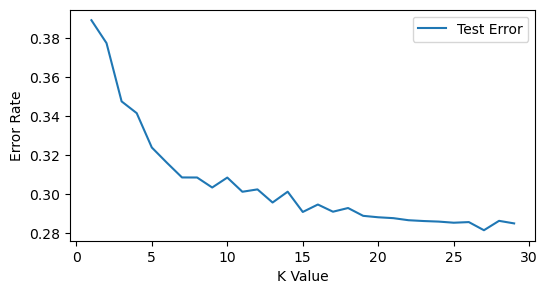

In [19]:
plt.figure(figsize=(6,3))
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [20]:
df3 = df[[ 'Food and drink', 'Seat comfort', 'On-board service', 'satisfaction']]
df3.head()

,Food and drink,Seat comfort,On-board service,satisfaction
0,5,5,4,neutral or dissatisfied
1,1,1,1,neutral or dissatisfied
2,5,5,4,satisfied
3,2,2,2,neutral or dissatisfied
4,4,5,3,satisfied


In [21]:
df3['satisfaction'] = df3['satisfaction'].map({
    'satisfied': 1,
    'neutral or dissatisfied': 0
})
df3.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6152\3531563937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['satisfaction'] = df3['satisfaction'].map({


,Food and drink,Seat comfort,On-board service,satisfaction
0,5,5,4,0
1,1,1,1,0
2,5,5,4,1
3,2,2,2,0
4,4,5,3,1


In [22]:
X = df3.drop('satisfaction',axis=1)
y = df3['satisfaction']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
scaler = StandardScaler()

In [25]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=10)

In [28]:
knn_model.fit(scaled_X_train,y_train)


KNeighborsClassifier(n_neighbors=10)

In [29]:
y_pred = knn_model.predict(scaled_X_test)

In [30]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6990247658154755


In [32]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

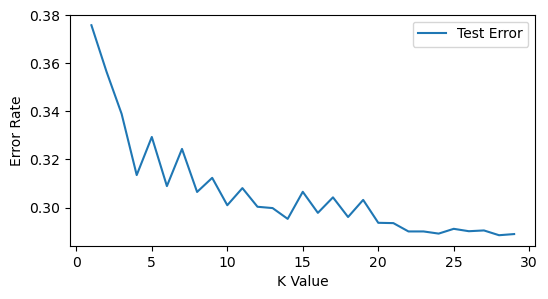

In [33]:
plt.figure(figsize=(6,3))
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")